# Verification tests on DC2 metacal catalog
Owner: Francois Lanusse 
Last Run: May 13th, 2019

This notebook intends to demonstrates the data access to a metacal catalog produced with the stack, through the GCR, as well running some basic checks.

In [2]:
%pylab inline

# Temporary fix while GCRCatalogs is updated
import sys
sys.path.insert(0, '/global/homes/f/flanusse/repo/gcr-catalogs/') # You need the master branch of gcr-catalogs: https://github.com/LSSTDESC/gcr-catalogs
import GCRCatalogs
from GCR import GCRQuery

Populating the interactive namespace from numpy and matplotlib


/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/register.py:23: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


In [3]:
catalog = GCRCatalogs.load_catalog('dc2_object_run1.2i_tract5063_with_metacal.yaml');

/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_dm_catalog.py:221: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(schema_stream)
/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_dm_catalog.py:150: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  base_dict = yaml.load(ofile)
/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_object.py:506: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(schema_stream)
/global/homes/f/flanusse/repo/gcr-catalogs/GCRCatalogs/dc2_object.py:420: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Ple

## Comparing measured sizes

In [137]:
# Let's select some sample by applying the recommended metacal cuts
mask = catalog['clean'] & (catalog['mcal_flags'] == 0) # Apply some quality cuts, although I guess to be rigorous we shouldn't apply the clean flag here
mask &= catalog['mcal_s2n'] > 10
# Let's restrict to objects with hsm shapes measured in the i band
mask &= catalog['merge_measurement_i']

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater_equal
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater


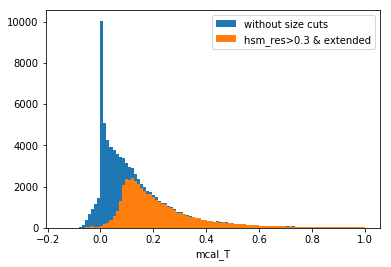

In [138]:
# Let's plot the mcal size distribution and see how it changes for resolved objects 
hist(catalog['mcal_T'][mask],100,range=[-0.15,1], label='without size cuts');
# Let's see what happens for objects detected as well resolved by the stack
mask_resolved = mask & (catalog['ext_shapeHSM_HsmShapeRegauss_resolution'] >= 0.3)
mask_resolved &= catalog['extendedness'] > 0
hist(catalog['mcal_T'][mask_resolved],100,range=[-0.15,1], label='hsm_res>0.3 & extended');
xlabel('mcal_T')
legend();

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


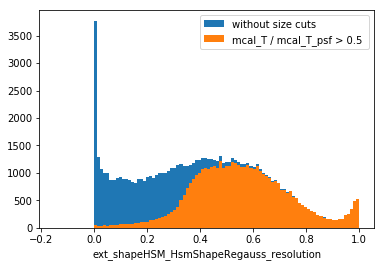

In [159]:
#  On the opposite, let's see what the mcal size cuts looks like in terms of resolution
hist(catalog['ext_shapeHSM_HsmShapeRegauss_resolution'][mask],100,range=[-0.15,1], label='without size cuts');
mask_resolved = mask & (catalog['mcal_T'] / catalog['mcal_T_psf'] > 0.5)
hist(catalog['ext_shapeHSM_HsmShapeRegauss_resolution'][mask_resolved],100,range=[-0.15,1], label='mcal_T / mcal_T_psf > 0.5 ');
xlabel('ext_shapeHSM_HsmShapeRegauss_resolution')
legend();

About 3.12 percent of objects seem borderline resolved


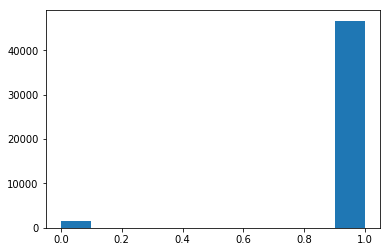

In [160]:
# Let's look at how many of these objects the stack thinks are not extende
hist(catalog['extendedness'][mask_resolved]);
print('About %0.02f percent of objects seem borderline resolved'%(100.*sum(catalog['extendedness'][mask_resolved] == 0) /len(catalog['extendedness'][mask_resolved])))

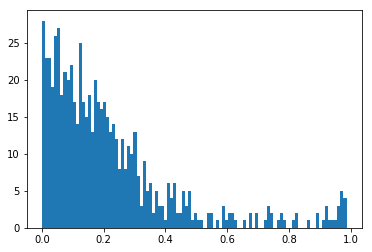

In [162]:
# Looking at size distribution of objects that appear resolved to metacal, and not to the stack
hist(catalog['ext_shapeHSM_HsmShapeRegauss_resolution'][mask_resolved & (catalog['extendedness'] == 0)],100);

## Comparing fluxes and magnitudes

In [105]:
# mask = catalog['clean'] & (catalog['mcal_flags'] == 0) # Apply some quality cuts
# #mask &= catalog['mcal_s2n'] > 10                       # Apply basic signal to noise cut
# mask &= catalog['extendedness'] > 0
# mask &= np.isfinite(catalog['mcal_mag_i']) & np.isfinite(catalog['mag_i_cModel'])
# #mask &= catalog['xy_flag'] == 0
# #mask &= catalog['ext_shapeHSM_HsmShapeRegauss_resolution'] >= 0.3
# mask &= catalog['mcal_T'] / catalog['mcal_T_psf'] > 0.5

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater


In [194]:
# Let's select a sample of resolved objects according to metacal
mask = catalog['clean'] & (catalog['mcal_flags'] == 0) # Apply some quality cuts, although I guess to be rigorous we shouldn't apply the clean flag here
mask &= catalog['mcal_s2n'] > 10
mask &= catalog['mcal_T'] / catalog['mcal_T_psf'] > 0.5
mask &= catalog['mcal_mag_i'] < 24.5

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


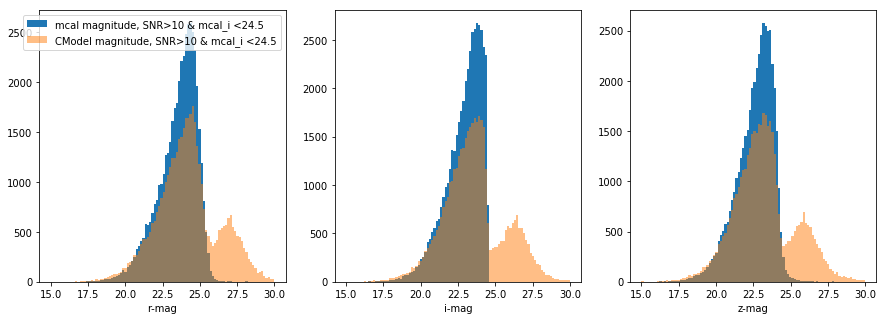

In [201]:
figure(figsize=(15,5))
subplot(131)
hist(catalog['mcal_mag_r'][mask],100,range=[15,30], label='mcal magnitude, SNR>10 & mcal_i <24.5');
hist(catalog['mag_r_cModel'][mask],100,range=[15,30], label='CModel magnitude, SNR>10 & mcal_i <24.5', alpha=0.5);
legend()
xlabel('r-mag')

subplot(132)
hist(catalog['mcal_mag_i'][mask],100,range=[15,30], label='mcal magnitude, SNR>10');
hist(catalog['mag_i_cModel'][mask],100,range=[15,30], label='CModel magnitude, SNR>10', alpha=0.5);

xlabel('i-mag')

subplot(133)
hist(catalog['mcal_mag_z'][mask],100,range=[15,30], label='mcal magnitude, SNR>10');
hist(catalog['mag_z_cModel'][mask],100,range=[15,30], label='CModel magnitude, SNR>10', alpha=0.5);

xlabel('z-mag');

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


Text(0.5, 0, 'ext_shapeHSM_HsmShapeRegauss_resolution')

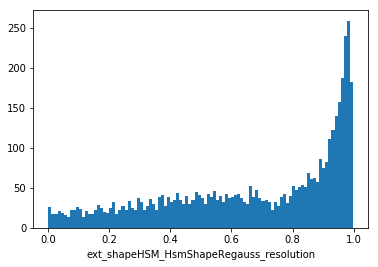

In [202]:
# Checking the size of these faint objects that metacal thinks are brigther than 24.5 mag
hist(catalog['ext_shapeHSM_HsmShapeRegauss_resolution'][mask & (catalog['mag_i_cModel'] > 25)],100);
xlabel('ext_shapeHSM_HsmShapeRegauss_resolution')

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


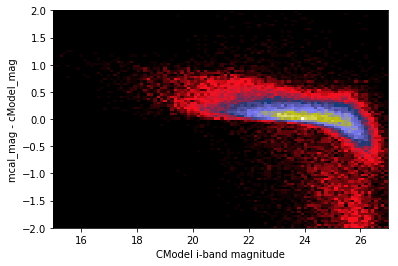

In [205]:
mask = catalog['clean'] & (catalog['mcal_flags'] == 0) # Apply some quality cuts, although I guess to be rigorous we shouldn't apply the clean flag here
mask &= catalog['mcal_s2n'] > 10
mask &= catalog['mcal_T'] / catalog['mcal_T_psf'] > 0.5

hist2d(catalog['mag_i_cModel'][mask], catalog['mcal_mag_i'][mask]  -  catalog['mag_i_cModel'][mask], 100,range=[[15,27], [-2,2]], cmap='gist_stern');
xlabel('CModel i-band magnitude');
ylabel('mcal_mag - cModel_mag');

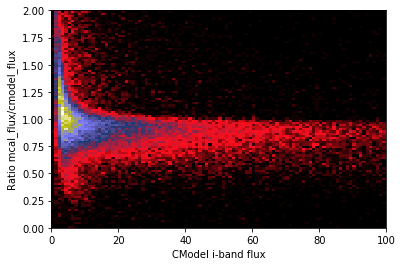

In [206]:
hist2d(catalog['modelfit_CModel_instFlux'][mask], catalog['mcal_flux_i'][mask] / catalog['modelfit_CModel_instFlux'][mask], 100,range=[[0,100], [0,2]], cmap='gist_stern');
xlabel('CModel i-band flux');
ylabel('Ratio mcal_flux/cmodel_flux');

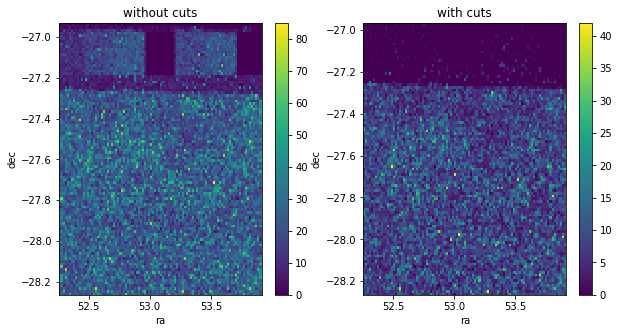

In [207]:
figure(figsize=(10,5))
subplot(121)
hist2d(catalog['ra'], catalog['dec'],100);
xlabel('ra');
ylabel('dec');
colorbar();

title('without cuts')

subplot(122)
hist2d(catalog['ra'][mask], catalog['dec'][mask],100);
xlabel('ra');
ylabel('dec');
colorbar();
title('with cuts');


## Basic shape tests

In [223]:
mask = catalog['clean'] & (catalog['mcal_flags'] == 0) # Apply some quality cuts, although I guess to be rigorous we shouldn't apply the clean flag here
mask &= catalog['mcal_s2n'] > 10
mask &= catalog['mcal_T'] / catalog['mcal_T_psf'] > 0.5
mask &= catalog['extendedness'] > 0
mask &= np.isfinite(catalog['mcal_mag_i']) & np.isfinite(catalog['mag_i_cModel'])
mask &= catalog['xy_flag'] == 0
mask &= catalog['ext_shapeHSM_HsmShapeRegauss_resolution'] >= 0.3

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_15/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater_equal


In [224]:
# Convert mcal shear to distortion for comparison with HSM shapes
mcal_g = np.sqrt(catalog['mcal_g1']**2 +  catalog['mcal_g2']**2)
mcal_e1 = - 2 * catalog['mcal_g1'] / (1 + mcal_g**2)
mcal_e2 = - 2 * catalog['mcal_g2'] / (1 + mcal_g**2)

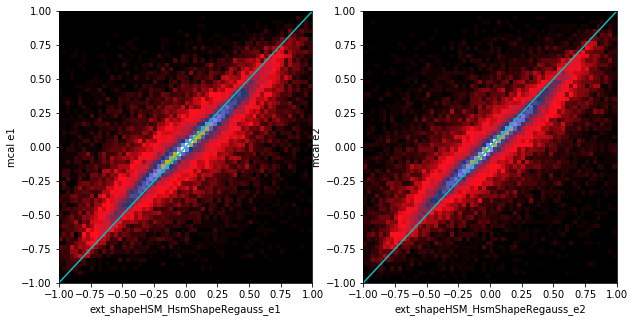

In [225]:
figure(figsize=(10,5))
subplot(121)
hist2d(catalog['ext_shapeHSM_HsmShapeRegauss_e1'][mask], mcal_e1[mask], 
       64, range=[[-1,1],[-1,1]], cmap='gist_stern');
ylabel('mcal e1')
xlabel('ext_shapeHSM_HsmShapeRegauss_e1');
plot([-1,1],[-1,1],color='c')

subplot(122)
hist2d(catalog['ext_shapeHSM_HsmShapeRegauss_e2'][mask], mcal_e2[mask], 
       64, range=[[-1,1],[-1,1]], cmap='gist_stern');
ylabel('mcal e2')
xlabel('ext_shapeHSM_HsmShapeRegauss_e2');
plot([-1,1],[-1,1],color='c')

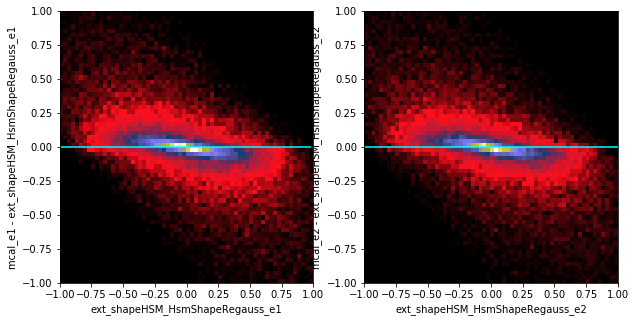

In [226]:
figure(figsize=(10,5))
subplot(121)
hist2d( catalog['ext_shapeHSM_HsmShapeRegauss_e1'][mask],  mcal_e1[mask] - catalog['ext_shapeHSM_HsmShapeRegauss_e1'][mask], 
       64, range=[[-1,1],[-1,1]],cmap='gist_stern');
xlabel('ext_shapeHSM_HsmShapeRegauss_e1')
ylabel('mcal_e1 - ext_shapeHSM_HsmShapeRegauss_e1')
axhline(0, color='cyan')
subplot(122)

hist2d( catalog['ext_shapeHSM_HsmShapeRegauss_e2'][mask],  mcal_e2[mask] - catalog['ext_shapeHSM_HsmShapeRegauss_e2'][mask], 
       64, range=[[-1,1],[-1,1]],cmap='gist_stern');
xlabel('ext_shapeHSM_HsmShapeRegauss_e2')
ylabel('mcal_e2 - ext_shapeHSM_HsmShapeRegauss_e2')
axhline(0, color='cyan')

Text(0, 0.5, 'mcal g2')

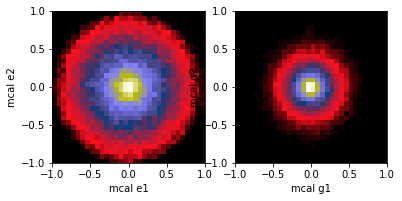

In [227]:
# Let's have a look at a 2D histogram of e1,e2
subplot(121)
hist2d( mcal_e1[mask],  mcal_e2[mask], 32, range=[[-1,1],[-1,1]],cmap='gist_stern');
gca().set_aspect('equal')
xlabel('mcal e1')
ylabel('mcal e2')

subplot(122)
hist2d( catalog['mcal_g1'][mask],  catalog['mcal_g2'][mask], 32, range=[[-1,1],[-1,1]],cmap='gist_stern');
gca().set_aspect('equal')
xlabel('mcal g1')
ylabel('mcal g2')